
---
<big><big><big><big><big><big>Nauczanie maszynowe 2018-19</big></big></big></big></big></big>

---





---
<big><big><big><big><big>Problemy uczenia maszynowego</big></big></big></big></big>

---



---

<div id="tocheading"><big><big><big><big>Spis treści</big></big></big></big></div>
<div id="toc"></div>

---


In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.style.use("fivethirtyeight")
sns.set(font_scale=2.0)

# Plan wykładu
---

---

# Modele uczenia
---
<img src="../ml_figures/Wstep_ml_graph.png" width="70%">

---
## nadzorowane
  * dane $$\{(x_i,y_i)\}$$ gdzie $y_i$ jest __poprawną odpowiedzią__
  * algorytm modyfikuje parametry modelu w kolejnych krokach
  * algorytm porównuje odpowiedź modelu z poprawną uzyskując __błąd__
  * błąd wpływa na modyfikację parametrów tak by minimalizować całkowity błąd
---
## nienadzorowane
  * dane w postaci $$\{x_i\}$$ __bez__ prawidłowej wartości
  * algorytm wyszukuje __statystyczne__ zależności
  * efektem może być podział na skupiska (klastrowanie)
    * ekspert może określić klasy dla skupisk
  * może być wstępem do uczenia nadzorowanego
    * dane __etykietowane__ są bardzo kosztowne
    * należy wykorzystać wszystkie dostępne
  * także uczenie połączone semi-nadzorowane
---
## ze wzmocnieniem (ang. reinforcement)
  * w nadzorowanym zdefiniowana _a priori_ funkcja kosztu
  * ale może nie być dostępna wartość _prawidłowa_
  * niech wartością referencyjną będzie __odpowiedź środowiska__
  * bardzo aktywnie rozwijane
    * DeepMind zbudował AlphaZero i AlphaGo do gry w Go -- model pokonał mistrza świata!
    <img src="../ml_figures/Wstep_alphago_zero_learning_curve.png" width="70%">

# Problemy uczenia maszynowego i architektury modeli
---

## Estymacja gęstości
1. dane: N punktów w wielowymiarowej przestrzeni
2. cel: estymacja gęstości prawdopodobieństwa
  * __klastrowanie__ próba znalezienia struktury danych
  * __identyfikacja anomalii__ wyszukiwanie obszarów niskiej gestości i ich opis
  * __identyfikacja skupisk__ umożliwia etykietowanie punktów
3. modele
  * histogram
  * modele kernelowe
  * metody najbliższych sąsiadów

In [3]:
from sklearn.neighbors import KernelDensity
X = np.random.normal(size=(1000, 2))
kd = KernelDensity()
kd.fit(X)
dens = kd.score_samples(X)

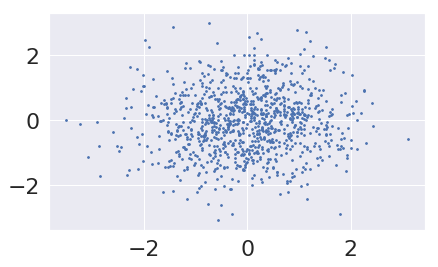

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=3.)

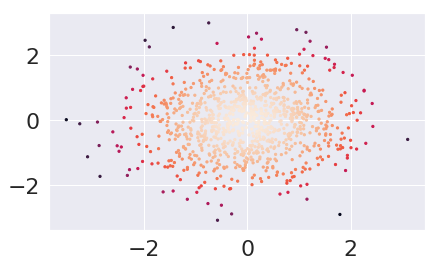

In [5]:
plt.scatter(X[:, 0], X[:, 1], s=5., c=dens)

## Redukcja wymiarowości
1. __Przekleństwo wymiarowości__
  * dane: N przykładów, każdy wektorem o wymiarze D w hipersześcianie $[0, 1]^D$
  * rozkład równomierny
  jaki procent przykładów będzie odległy od początku układu __co najwyżej__ o 0.5 w każdym kierunku?

<img src="../ml_figures/Wstep_COD.png" width="80%"> [Typowe przedstawienie]

* jaka jest szansa, że dowolny punkt lezy w odległosci co najwyżej 1 od środka układu współrzędnych?
  * dla $D=2$ mamy $$\pi r^2/(2r)^2 \simeq 0.785$$
  * dla $D=3$ mamy $$(4/3)\pi r^3 / (2r)^3 \simeq 0.523$$
* ten współczynnik bardzo szybko maleje
  * punkty danych stają się coraz bardziej od siebie odległe
* uczenie maszynowe polega na znajdywaniu _podobieństw_
  * punkty odległe od siebie są coraz mniej "podobne"
  * wraz ze wzrostem $D$ będzie potrzeba coraz większego N punktów - wzrost jest __wykładniczy__
  * wraz ze wzrostem coraz większa frakcja przestrzeni potrzebna jest dla znalezienia takiej samej frakcji przykładów
<img src="../ml_figures/Wstep_curseofdimensionality.png" width="80%">  
  
* zwykle cechy danych są ze sobą skorelowane
* wiele cech (ang. features) __nie ma__ wpływu na poszukiwane wartości
* potrzebna jest redukcja wymiarowości
  * zmniejszy wymagane minimalne N
  * usunięcie skorelowanych i nieistotnych cech
  * niektóre cechy są kombinacjami liniowymi innych
  
2. narzędzia
  * Principal Component Analysis PCA
  * Independent Component Analysis ICA
  * manifold learning
---

## Regresja
1. dane opisują nieznaną funkcję $F$
2. budujemy model $$y=f(x\mid \theta)$$ 
 
3. Modele

  * regresja liniowa $$y=\sum_i w_ix_i$$

    <img src="../ml_figures/Wstep_regression.png" width="80%"> 
    * wielomianowe funkcje bazowe $$y=\sum_iw_if(x_i)$$
  * regresja nieliniowa
  * metody regularyzacji
  * metody kernelowe
  * metody Bayesowskie

* minimalizujemy błąd między wartosciami prawdziwymi a uzyskanymi z modelu
* ale model, jeśli wystarczajaco pojemny, nauczy się __wszystkich__ danych idealnie $-$ co z predykcją innych?
  
---

## Klasyfikacja
1. __dane__ $$\{(x_i, y_i),i=1,\dots,N\}$$ przy czym $$y_i\in\{1,\dots,K\}$$ który jest zbiorem __możliwych__ klas
2. __cel__ model przewidujący poprawną odpowiedź z najmniejszym oczekiwanym błędem
  * interesuje nas błąd na zbiorze przykładów, których algorytm budujący model __nie__ widział
  <img src="../ml_figures/Wstep_classification_spam.png" width="80%">  [Google]
3. __rodzaje modeli klasyfikacji__
  * binarna (binary): dwie dostępne klasy (dobry/niedobry), (spam/normalny), (należący do klasy/inny)
  * wieloklasowa (multi-class): prawdziwa _dokładnie_ jedna z K możliwych klas (koza __albo__ małpa __albo__ krowa __albo__ ryba)
  * wielo-etykietowa (multilabel): gdy przykład może być zaklasyfikowany do _kilku_ możliwych klas
    * klasyfikacja artykułów w gazecie (sport / polityka / miejskie / zagranica / społeczne)
      * bardzo trudne, słabo rozwinięte

3. __modele__

  * liniowe / nieliniowe
  <img src="../ml_figures/Wstep_classification_linear-nonlinear.png" width="60%">  [Wiki]  
    * modele liniowe budują __hiperpłaszczyzny__ rozdzielające w przestrzeni cech
    * użyte cechy wejściowe mogą być nieliowymi funkcjami atrybutów z danych

  * klasyfikator Bayesowski i naiwny klasyfikator Bayesowski
  * regresja logistyczna
  * metody dyskryminacyjne
  * klasyfikacja z wykorzystaniem metod najbliższych sąsiadów
  * Support Vector Machines SVM
  <img src="../ml_figures/Wstep_svm_linear.png" width="50%">
  <img src="../ml_figures/Wstep_svm_nonlinear.png" width="50%">

  * drzewa decyzyjne i lasy drzew
  <img src="../ml_figures/Wstep_tree.png" width="60%">

  * drzewa gradient boosted
  * modele składające wyniki, np. AdaBoost
  * sieci neuronowe
  * modele rekurencyjne
  <img src="../ml_figures/Wstep_LSTM_working.gif" width="60%">
  
    * analiza tekstu NLP

4. __problemy__
  * w jaki sposób ocenić czy znaleziony model jest _dobry_?
    * dodatkowe zbiory danych, porównywanie z rzeczywistością
    * walidacja krzyżowa czy metody bootstrap dla maksymalnego wykorzystania dostępnych danych jednocześnie do uczenia jak i walidacji (testowania) modeli
  * pojemność modeli
    * model o dużej liczbie parametrów będzie potrafił _zapamiętać_ dane uczące __ale__ będzie słabo przewidywał
    * optimum: znaleźć najmniejszy model, który daje wystarczająco dobrą dokładność
  * w jaki sposób porównywać między sobą modele?
    * testy statystyczne pozwalajace porównywac modele
    * wizualizacja wyników
      * [Popularność Trumpa w USA](https://projects.fivethirtyeight.com/trump-approval-ratings/?ex_cid=rrpromo).
      * pakiety ``pandas``, ``matplotlib``, ``seaborn``, ``bokeh`` w Pythonie (miedzy innymi)
      * jak robią to w [fivethirtyeight.com](https://fivethirtyeight.com/features/the-52-best-and-weirdest-charts-we-made-in-2016/)?
  ---

## Analiza szeregów czasowych
1. __dane__ $$(t_1, y_1), (t_2, y_2), \dots, (t_N, y_N)$$
2. __cel__ przewidzenie $y_{k+1}$ na podstawie $$(t_{k-p},y_{p}),\dots,(t_k,y_k)$$
  * celem może być zarówno regresja jak i klasyfikacja
  <img src="../ml_figures/Wstep_regression_forecast.gif" width="80%"> 
  
  [tutaj wielokrotna regresja liniowa, MAPE - mean average percentage error, źródło: rweekly]
3. __problemy__
  * wartość $y_k$ zależy bezpośrednio od poprzednich (inaczej niż w regresji)
  * wiele danych jest szumem
  * w danych występują trendy i okresowości
    * zużycie prądu ulega fluktuacjom dziennym, tygodniowym, rocznym
    * cały czas rośnie
  * problem szerokości okienka
    * zanikanie wpływu starych danych, ale istnienie wpływu pamięci długoterminowej
4. __modele__
  * ARMA: auto-regressing moving average $$x_t=\mu+\epsilon_t+\sum_{i=1}^pw_i\epsilon_{t-i}$$
    * przewidywanie na podstawie ostatniego okienka o szerokości $p$
  * analiza fourierowska i falkowa
  * sieci neuronowe
---

# Pipeline uczenia
---
* typowy przebieg proesu uczenia
  <img src="../ml_figures/Wstep_training_pipeline.png" width="80%">  [Google]
  * zbieranie danych
  * wyszukiwanie podstawowych własności problemu: ile jest klas, ile przykładów, jakie są atrybuty, czy klasy są niezależne, etc.
    * gdy są to szeregi czasowe, to określić orientacyjną zależność od poprzednich wartości?
    * określić rozkład liczności klas w przykładach
      * jesli są bardzo nierównoliczne, trzeba będzie jakoś dostosować model/dane
  * przygotowanie danych
    * reprezentacja atrybutów, liczba atrybutów, ewentualna redukcja wymiarowości
  * budowa modelu
    * wybór architektury (wielu różnych) w zależności od problemu
  * trenowanie i ewaluacja modeli
    * wybór funkcji kosztu
      * ___accuracy___ czyli frakcja poprawnych klasyfikacji
  

# Źródła danych i konkursy
* ogólnie dostępne źródła danych są potrzebne dla wiarygodnego porównywania tworzonych algorytmów
  * [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
* niektóre serwisy dzielą się swoimi danymi
  * szanse demokratów i republikanów na przejęcie [kontroli nad izbą reprezentantów])https://projects.fivethirtyeight.com/2018-midterm-election-forecast/house/?ex_cid=rrpromo)
  * [fivethirtyeight.com](https://data.fivethirtyeight.com)
  * MNIST: ręcznie pisane cyfry 28x28 w skali szarości 60 tysięcy przykładów uczących i 10 tysięcy wybranych testowych
    * wszystkie wyniki są testowane na tych samych przykładach
  * [CIFAR-10/CIFAR-100](http://www.cs.toronto.edu/~kriz/cifar.html): obrazy kolorowe 32x32 z 10 lub 100 klas
    * 60 tysiecy etykietowanych, 10 tysiecy testowych
    * dostępne znacznie więcej nie etykietowanych (kilkadziesiąt milionów)
    * [COCO](http://cocodataset.org/#home) Common Objects in COntext
      * wiele obiektów na tym samym obrazie
      * 330 tysięcy dostępnych, ponad 200 etykietowanych (każdy obiekt na obrazie)
      * MS-COCO jest corocznym konkursem polegajacym na rozdzielaniu obiektów na filmie
      * obiekty są __w różnej__ skali
    *  [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) obrazy celebrytów
      * bardzo często wykorzystywany w testach modeli autoenkoderów
    * [ImageNet](http://image-net.org/index) ponad 14 milionów zdjęć różnych obiektów
      * ułożonych w hierarchię według WordNet
      * coroczny konkurs na Kaggle
      * w 2012 wygrał go Alex Krizevsky z konwolucyjną architekturą AlexNet
* jest wiele konkursów polegajacych na rozwiązaniu problemu
  * [Kaggle](https://www.kaggle.com/?)